##  Bag-of-words - Python
- Basic method for finding topics in a text
- Need to first create tokens using tokenization and then count up all the tokens
- The more frequent a word, the more important it might be
- Can be a great way to determine the significant words in a text

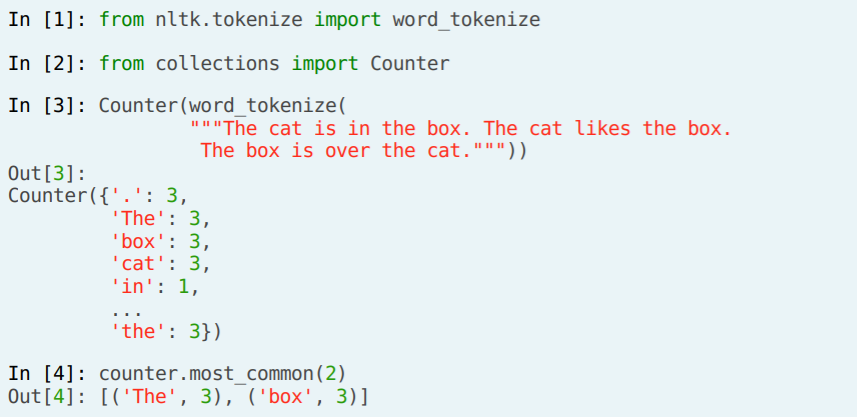

Which of the below options, with basic nltk tokenization, map the bag-of-words for the following text?

"The cat is in the box. The cat box."


- A. ('the', 3), ('box.', 2), ('cat', 2), ('is', 1)

- B. ('The', 3), ('box', 2), ('cat', 2), ('is', 1), ('in', 1), ('.', 1)

- C. ('the', 3), ('cat box', 1), ('cat', 1), ('box', 1), ('is', 1), ('in', 1)

- D. ('The', 2), ('box', 2), ('.', 2), ('cat', 2), ('is', 1), ('in', 1), ('the', 1)


In [6]:
from nltk.tokenize import word_tokenize
from collections import Counter
text = "The cat is in the box. The cat box."

count = Counter(word_tokenize(text))

count  # So answer D is correct 

Counter({'.': 2, 'The': 2, 'box': 2, 'cat': 2, 'in': 1, 'is': 1, 'the': 1})

In [26]:
# Import Counter
from collections import Counter
from nltk.tokenize import word_tokenize

wiki_debugging = open(r'C:\Users\Lenovo\Documents\NLP\Wikipedia articles\wiki_text_debugging.txt').read()

# Tokenize the article: tokens
tokens = word_tokenize(wiki_debugging)


In [32]:
# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(18))



[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 68), ('to', 63), ('a', 60), ('in', 44), ('and', 41), ('debugging', 40), ('(', 40), (')', 40), (':', 31), ('``', 30), ('for', 26), ('is', 25), ('or', 25), ('be', 24)]


### Preprocessing the text but Why preprocess?

- Helps make for better input data
- When performing machine learning or other statistical methods

Examples:
- Tokenization to create a bag of words
- Lowercasing words
- Lemmatization/Stemming
- Shorten words to their root stems
- Removing stop words, punctuation, or unwanted tokens
- Good to experiment with different approaches

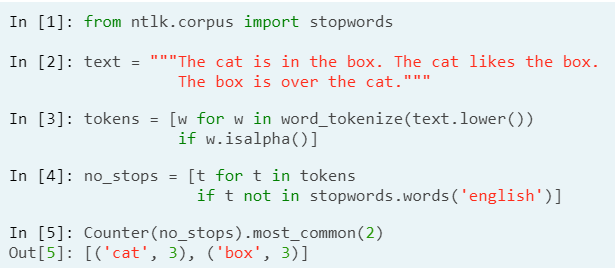

In [40]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

english_stops = stopwords.words('english')

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))


[('debugging', 40), ('system', 25), ('software', 16), ('bug', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('used', 12)]


### Introduction to gensim

- gensim models can be easily saved, updated, and reused
- Our dictionary can also be updated
- This more advanced and feature rich bag-of-words can be used




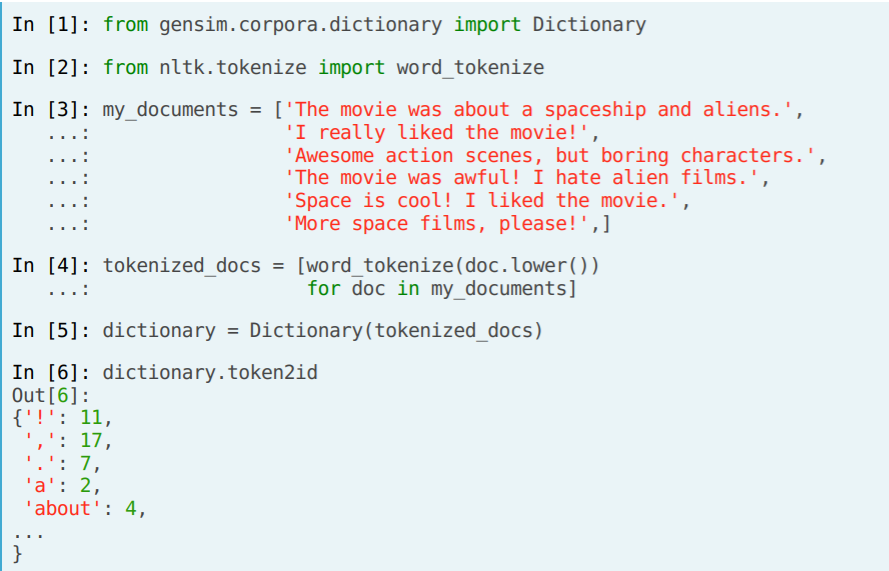

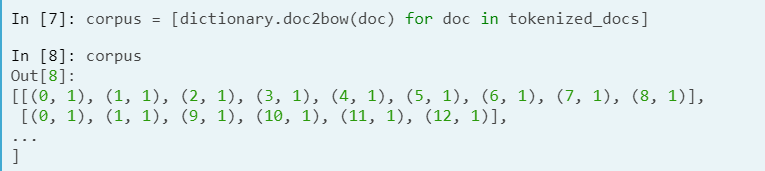

In [61]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

articles = [word_tokenize(t.lower()) for t in alpha_only if t not in english_stops]

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])


computer
[(4, 1)]



Now, you'll use your new gensim corpus and dictionary to see the most common terms per document and across all documents. You can use your dictionary to look up the terms. Take a guess at what the topics are and feel free to explore more documents in the IPython Shell!

In [63]:
from collections import defaultdict
import itertools 

# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)


for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(word_id, word_count)

defects 1
0 40
10 19
9 16
292 14
1 12


### What is tf-idf?
- Term frequency - inverse document frequency
- Allows you to determine the most important words in each document
- Each corpus may have shared words beyond just stopwords
- These words should be down-weighted in importance
- Example from astronomy: "Sky"
- Ensures most common words don't show up as key words
- Keeps document specific frequent words weighted high

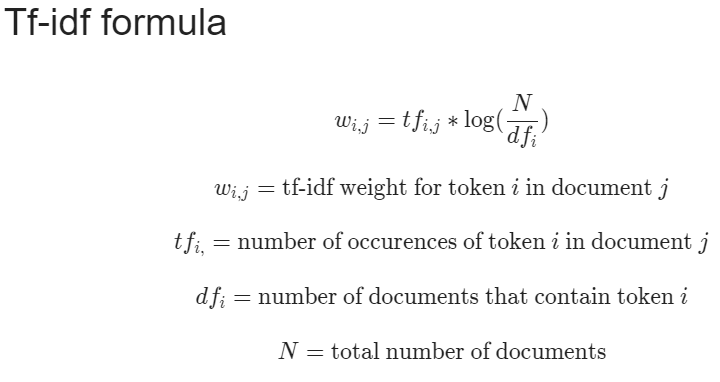

# Example
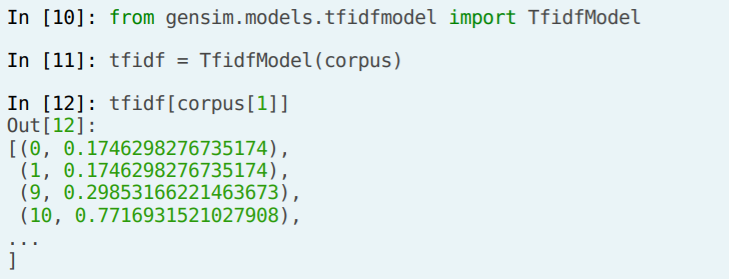

In [57]:
# Import TfidfModel
from gensim.models.tfidfmodel import TfidfModel

# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id),weight)

[(4, 1.0)]
defects 1.0
